# Handle Categorical Features

##### To handling the categorical features we need to conver them into some numeric values. and for convertion we will use Encoding Technique.

There are two types of encoding technique,
1. Nominal Encoding
2. Ordinal Encoding

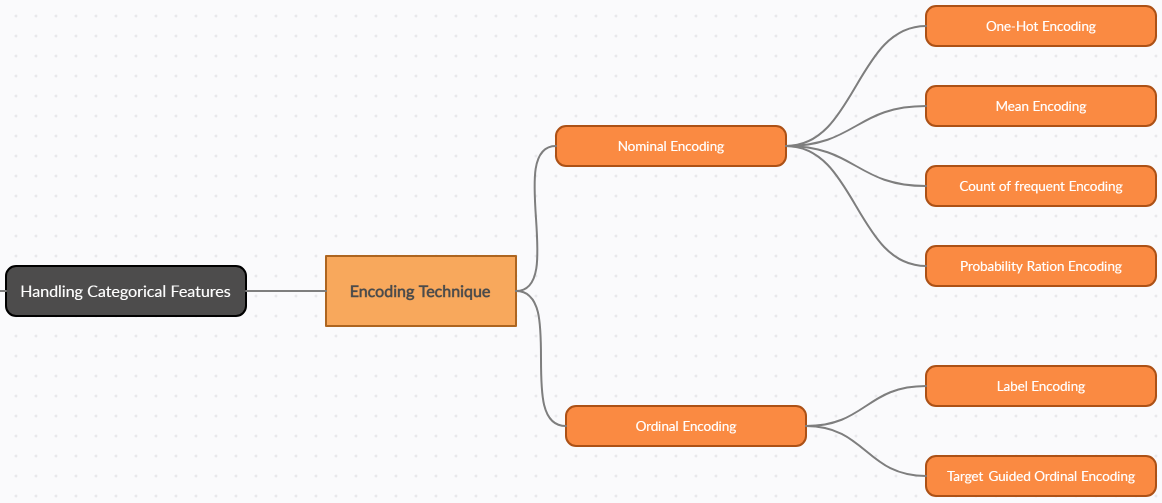

# 1. Nominal Encoding (do not have any order)

## One-Hot Encoding

In [82]:
import pandas as pd

In [83]:
# lets consider first if we having only two categories in our features.
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [84]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [85]:
pd.get_dummies(df,drop_first=True).head()  # here we are droping the first feature, only one feature will be show.

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [86]:
# Lets see for another feature
df=pd.read_csv('titanic.csv',usecols=['Embarked'])

In [87]:
df['Embarked'].unique()  # checking how many unque value this feature having

array(['S', 'C', 'Q', nan], dtype=object)

In [88]:
# As we can see there is some nan values, we can also handle those but for simplicity I am droping all
df.dropna(inplace=True)

In [89]:
pd.get_dummies(df).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


here we can see ther is 3 new features created, now we are droping first one using the above code

In [90]:
pd.get_dummies(df,drop_first=True).head() #droping first dummy featue

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


##### One-Hot encoding with many categories in a feature

In [91]:
df=pd.read_csv('mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [92]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [93]:
# lets see how many unique values having in X0 feature
len(df['X0'].unique())

47

In [94]:
# looking for every feature unique values
for i in df.columns:
    print(i,':',len(df[i].unique()))

X0 : 47
X1 : 27
X2 : 44
X3 : 7
X4 : 4
X5 : 29
X6 : 12


In [95]:
# let see how many times one item repeate in the features
df.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
l      16
aw     16
ad     14
au     11
b      11
k      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [96]:
# Here we will consider top 10 repeted items only as its having many items in this categorical feature.
df.X0.value_counts().sort_values(ascending=False).head(10)

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
Name: X0, dtype: int64

In [97]:
lst_10=df.X0.value_counts().sort_values(ascending=False).head(10).index
lst_10 = list(lst_10)
lst_10

['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w']

In [98]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X0']==categories,1,0)

In [99]:
lst_10.append('X0')

In [100]:
df[lst_10]

,z,ak,y,ay,t,x,o,f,n,w,X0
0,0,0,0,0,0,0,0,0,0,0,k
1,0,0,0,0,0,0,0,0,0,0,k
2,0,0,0,0,0,0,0,0,0,0,az
3,0,0,0,0,0,0,0,0,0,0,az
4,0,0,0,0,0,0,0,0,0,0,az
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,ak
4205,0,0,0,0,0,0,0,0,0,0,j
4206,0,1,0,0,0,0,0,0,0,0,ak
4207,0,0,0,0,0,0,0,0,0,0,al


##### similerly we will use for all the features and create new dataframe to train the model.

## Mean Encoding

In [101]:
df=pd.read_csv('titanic.csv')

In [102]:
df['Cabin'].fillna('Missing',inplace=True)

In [103]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S


In [105]:
mean_nominal=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [106]:
mean_nominal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [107]:
df['mean_nominal_encode']=df['Cabin'].map(mean_nominal)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,mean_nominal_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0.299854
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.593220
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0.299854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.593220
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0.299854
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,M,Q,0.299854
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,0.750000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,M,S,0.299854
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,M,S,0.299854
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,M,C,0.299854


## Count Or Frequency Encoding

In [52]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()                                                         

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [53]:
columns=[1,3,5,6,7,8,9,13]

In [54]:
train_set=train_set[columns]

In [55]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [56]:
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [57]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [58]:
country_map=train_set['Country'].value_counts().to_dict()
country_map

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' Greece': 29,
 ' France': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Laos': 18,
 ' Thailand': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [59]:
train_set['Country']=train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


##### Advantages
1. Easy To Use
2. Not increasing feature space
##### Disadvantages
1. It will provide same weight if the frequencies are same

# Ordinal Encoding

In [124]:
import datetime

In [125]:
today_date=datetime.datetime.today()

In [126]:
today_date

datetime.datetime(2021, 1, 28, 13, 48, 0, 322619)

In [127]:
today_date-datetime.timedelta(3)

datetime.datetime(2021, 1, 25, 13, 48, 0, 322619)

In [128]:
#### List Comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]

In [129]:
import pandas as pd
data=pd.DataFrame(days)
data.columns=["Day"]

In [130]:
data.head()

,Day
0,2021-01-28 13:48:00.322619
1,2021-01-27 13:48:00.322619
2,2021-01-26 13:48:00.322619
3,2021-01-25 13:48:00.322619
4,2021-01-24 13:48:00.322619


In [131]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-01-28 13:48:00.322619,Thursday
1,2021-01-27 13:48:00.322619,Wednesday
2,2021-01-26 13:48:00.322619,Tuesday
3,2021-01-25 13:48:00.322619,Monday
4,2021-01-24 13:48:00.322619,Sunday


In [132]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7
    
    
}

In [133]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [134]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [135]:
data

,Day,weekday,weekday_ordinal
0,2021-01-28 13:48:00.322619,Thursday,4
1,2021-01-27 13:48:00.322619,Wednesday,3
2,2021-01-26 13:48:00.322619,Tuesday,2
3,2021-01-25 13:48:00.322619,Monday,1
4,2021-01-24 13:48:00.322619,Sunday,7
5,2021-01-23 13:48:00.322619,Saturday,6
6,2021-01-22 13:48:00.322619,Friday,5
7,2021-01-21 13:48:00.322619,Thursday,4
8,2021-01-20 13:48:00.322619,Wednesday,3
9,2021-01-19 13:48:00.322619,Tuesday,2


## Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [60]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [61]:
df['Cabin'].fillna('Missing',inplace=True)

In [62]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [63]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [64]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [65]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [66]:
df.groupby(['Cabin'])['Survived'].mean().sort_values().index

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [67]:
ordinal_labels=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [68]:
enumerate(ordinal_labels,0)

In [69]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [70]:
df['Cabin_ordinal_labels']=df['Cabin'].map(ordinal_labels2)
df.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1
